In [1]:
import sys
sys.path.append("/home/bolun/unitree_ws/src/unitree_legged_sdk/lib/python/amd64")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

from B1Py.interfaces import B1HighLevelReal

In [2]:
robot = B1HighLevelReal(test=True)

vxs = np.random.uniform(-2, 2, 10000)
vys = np.random.uniform(-2, 2, 10000)

clipped_vxs = []
clipped_vys = []

for vx, vy in zip(vxs, vys):
    _vx, _vy = robot.clip_velocity(vx, vy)
    clipped_vxs.append(_vx)
    clipped_vys.append(_vy)

clipped_vxs = np.array(clipped_vxs)[:, np.newaxis]
clipped_vys = np.array(clipped_vys)[:, np.newaxis]
vs = np.hstack([clipped_vxs, clipped_vys])

UDP Initialized. socketfd: 75   Port: 8080


(-1.0, 1.0)

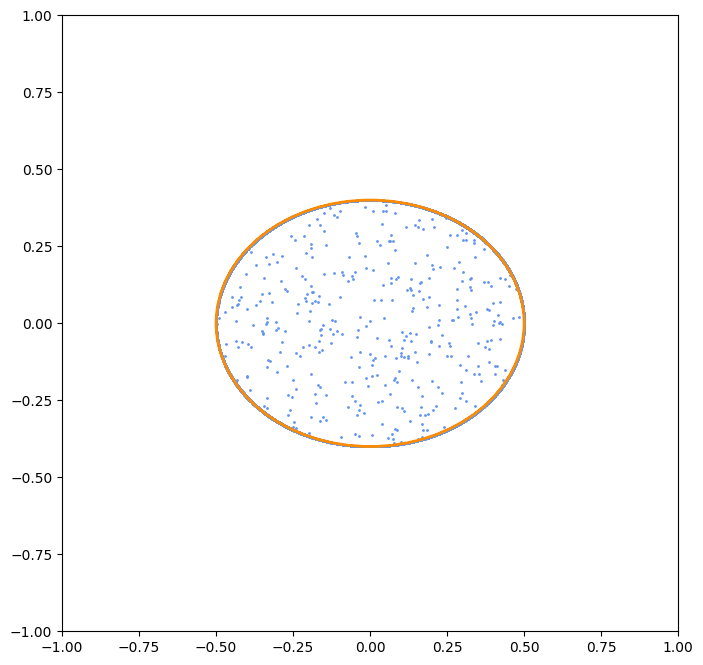

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(clipped_vxs, clipped_vys, s=1, c="cornflowerblue")
ellipse = Ellipse((0, 0), 2 * robot.vx_max, 2 * robot.vy_max, angle=0.0, fill=False, edgecolor="darkorange", linewidth=2, zorder=10)

ax.add_patch(ellipse)
ax.set_aspect('equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)